In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

In [2]:
library = pyna.ReacLibLibrary()

sub = library.linking_nuclei(["p","n","he3","he4","c12","c13","n13","n14","o14","o15",
                             "o16","o17","o18","f17","f18","f19","ne18","ne19","ne20",
                             "mg22","mg24","al27","si28","p31","s32","cl35",
                             "ar36","k39","ca40","ti44","cr48","cr49","cr50","cr51",
                             "cr52","cr53","cr54","fe52","fe54","fe55","fe56","fe57",
                             "fe58","co55","ni55","ni56","ni58","ni59","ni60",
                              "ni61","ni62","ni63","ni64","ni66","ni67","ni68","cu57","ni70"])

rc = pyna.RateCollection(libraries=sub)

# Add ni70 by force.
rc.unique_nuclei.append(pyna.Nucleus("ni70"))

warning ni70 was not able to be linked


In [3]:
rho_1 = 1e7
ye_s = np.linspace(0.4,0.6,80)
temp_1 = 9.0e9
X_s_1 = []

guess = [-6.0, -11.5]
for i, ye in enumerate(ye_s):
    nse_comp_1, sol = rc.get_comp_nse(rho_1, temp_1, ye, init_guess=[-6.0,-11.5],
                                 use_coulomb_corr=True, return_sol=True)
    guess = sol
    nse_X_s_1 = [nse_comp_1.X[nuc] for nuc in nse_comp_1.X]
    X_s_1.append(nse_X_s_1)

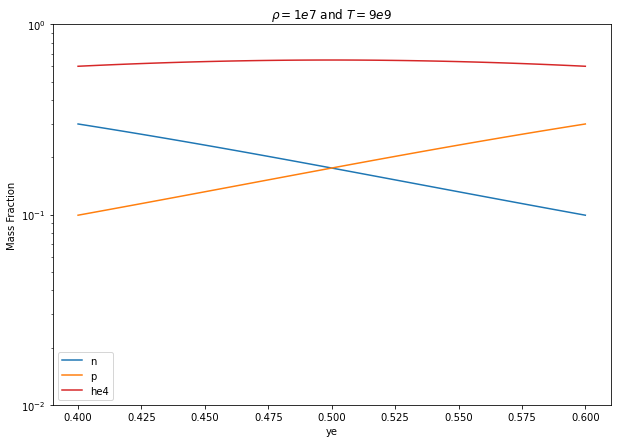

In [4]:
X_s_1 = np.array(X_s_1)
nuc_names = rc.get_nuclei()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for k in range(len(nuc_names)):
    line, = ax.plot(ye_s, X_s_1[:,k])
    if (max(X_s_1[:,k]) > 0.01):
        line.set_label(str(nuc_names[k]))
ax.legend(loc = "best")
ax.set_xlabel('ye')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([0.01,1])
ax.set_title(r"$\rho = 1e7$ and $T=9e9$")
plt.savefig("nse_fig1.pdf", format="pdf")

In [5]:
rho_2 = 1e7
ye_s = np.linspace(0.4,0.6,100)
temp_2 = 6.5e9
X_s_2 = []

guess = [-6.0, -11.5]
for i, ye in enumerate(ye_s):
    nse_comp_2, sol = rc.get_comp_nse(rho_2, temp_2, ye, init_guess=guess,
                                 use_coulomb_corr=True, return_sol=True)
    guess = sol
    nse_X_s_2 = [nse_comp_2.X[nuc] for nuc in nse_comp_2.X]
    X_s_2.append(nse_X_s_2)

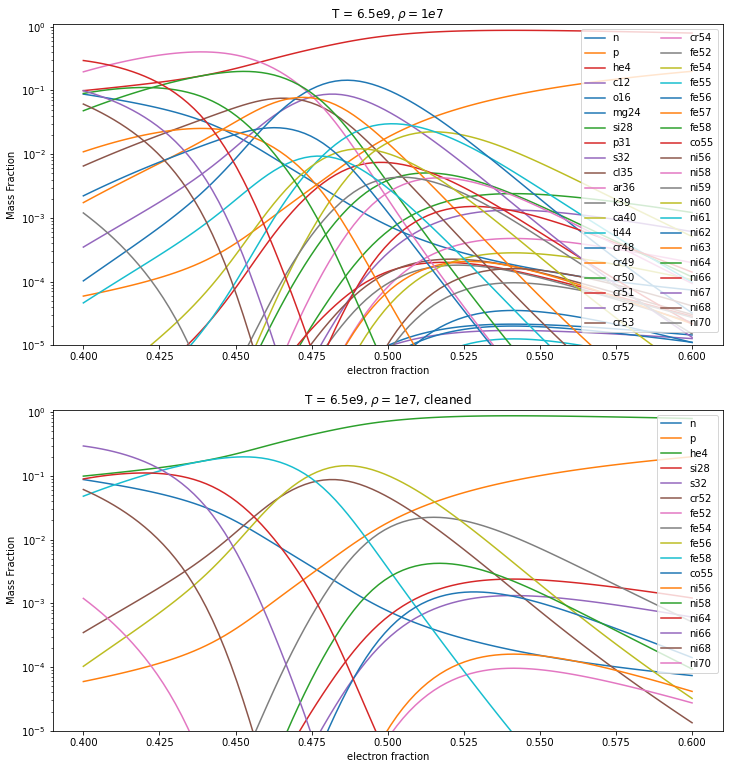

In [6]:
X_s_2 = np.array(X_s_2)
nuc_names = rc.get_nuclei()

paper_nucs =["n", "p", "he4", "si28", "s32", "cr52", "fe52", "fe54", "fe56", "fe58",
             "co55", "ni56", "ni58", "ni64", "ni66", "ni68","ni70"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))


low_limit = 1e-5
fig = plt.figure(figsize=(12,13))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for k in range(len(nuc_names)):
    if nuc_names[k] in paper_nucs:
        line1, = ax1.plot(ye_s, X_s_2[:,k])
        if (max(X_s_2[:,k]) > low_limit):
            line1.set_label(str(nuc_names[k]))
            
    line, = ax.plot(ye_s, X_s_2[:,k])
    if (max(X_s_2[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right", prop={'size':10},ncol=2)
ax.set_xlabel('electron fraction')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"T = 6.5e9, $\rho = 1e7$")

ax1.legend(loc = "upper right")
ax1.set_xlabel('electron fraction')
ax1.set_ylabel('Mass Fraction')
ax1.set_yscale('log')
ax1.set_ylim([low_limit,1.1])
ax1.set_title(r"T = 6.5e9, $\rho = 1e7$, cleaned")

plt.savefig("nse_fig2.pdf", format="pdf")

In [7]:
rho_3 = 1e7
ye_s = np.linspace(0.4,0.6,120)
temp_3 = 3.5e9
X_s_3 = []

guess = [-6.0, -11.5]
for i, ye in enumerate(ye_s):
    nse_comp_3, sol = rc.get_comp_nse(rho_3, temp_3, ye, init_guess=guess,
                                use_coulomb_corr=True, return_sol=True)
    guess = sol
    nse_X_s_3 = [nse_comp_3.X[nuc] for nuc in nse_comp_3.X]
    X_s_3.append(nse_X_s_3)

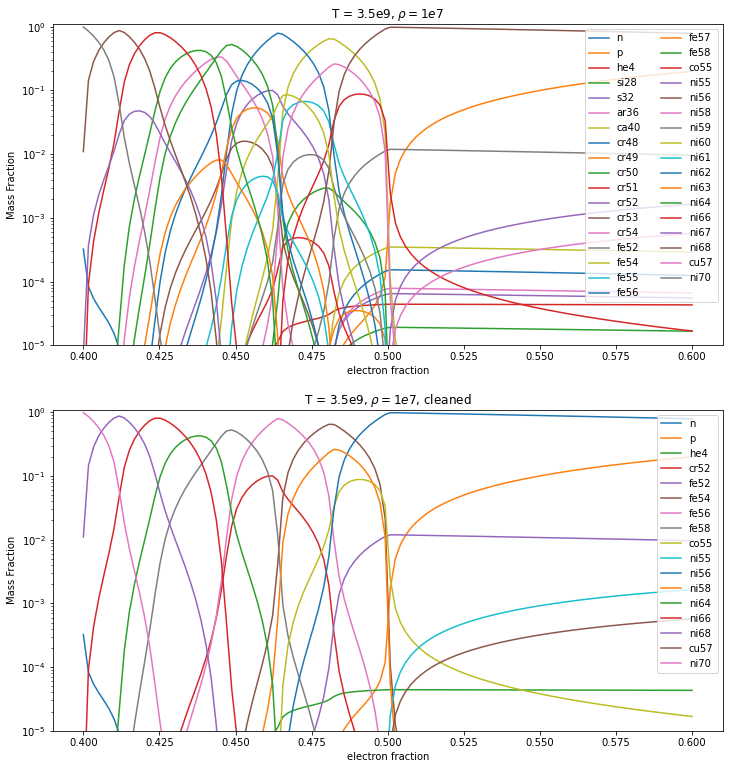

In [8]:
X_s_3 = np.array(X_s_3)
nuc_names = rc.get_nuclei()

paper_nucs = ["p", "n", "he4", "cr52", "fe52", "fe54", "fe56", "fe58", "co55", "ni55", "cu57",
             "ni56", "ni58", "ni64", "ni66", "ni68", "ni70"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))

low_limit = 1e-5
fig = plt.figure(figsize=(12,13))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for k in range(len(nuc_names)):
    if nuc_names[k] in paper_nucs:
        line1, = ax1.plot(ye_s, X_s_3[:,k])
        if (max(X_s_3[:,k]) > low_limit):
            line1.set_label(str(nuc_names[k]))
            
    line, = ax.plot(ye_s, X_s_3[:,k])
    if (max(X_s_3[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right", prop={'size':10},ncol=2)
ax.set_xlabel('electron fraction')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"T = 3.5e9, $\rho = 1e7$")

ax1.legend(loc = "upper right")
ax1.set_xlabel('electron fraction')
ax1.set_ylabel('Mass Fraction')
ax1.set_yscale('log')
ax1.set_ylim([low_limit,1.1])
ax1.set_title(r"T = 3.5e9, $\rho = 1e7$, cleaned")

plt.savefig("nse_fig3.pdf", format="pdf")

In [9]:
rho = 1e7
ye = 0.5
temps = np.linspace(2.5, 12.0, 100)
X_s = []

guess = [-6.0, -11.5]
for i, temp in enumerate(temps):
    nse_comp, sol = rc.get_comp_nse(rho, temp*1.0e9, ye, init_guess=guess,
                                   use_coulomb_corr=True, return_sol=True)
    guess = sol
    nse_X_s = [nse_comp.X[nuc] for nuc in nse_comp.X]
    X_s.append(nse_X_s)

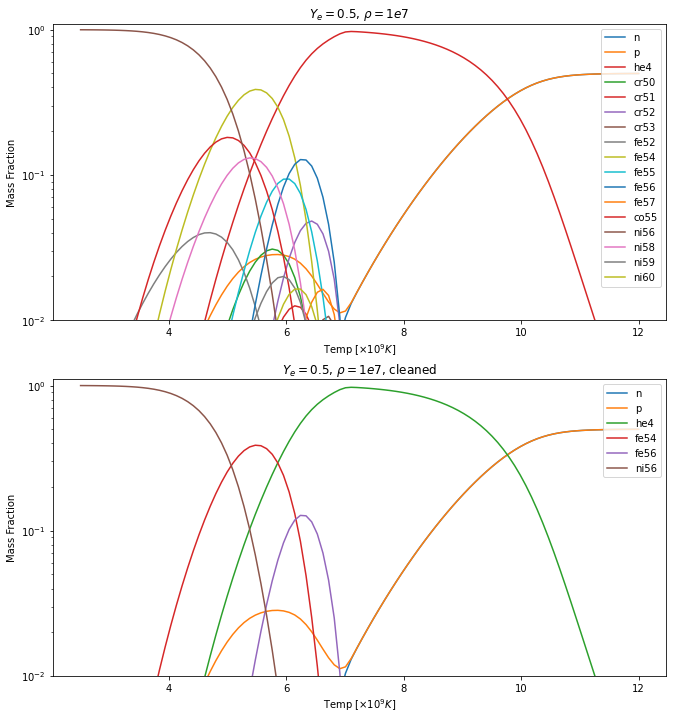

In [10]:
X_s = np.array(X_s)
nuc_names = rc.get_nuclei()

paper_nucs = ["p", "n", "he4", "ni56", "fe54", "fe56"]
paper_nucs = list(map(pyna.Nucleus, paper_nucs))

low_limit = 1e-2
fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)
for k in range(len(nuc_names)):
    if nuc_names[k] in paper_nucs:
        line1, = ax1.plot(temps, X_s[:,k])
        if (max(X_s[:,k]) > low_limit):
            line1.set_label(str(nuc_names[k]))
            
    line, = ax.plot(temps, X_s[:,k])
    if (max(X_s[:,k]) > low_limit):
        line.set_label(str(nuc_names[k]))

ax.legend(loc = "upper right")
ax.set_xlabel(r'Temp $[\times 10^9 K]$')
ax.set_ylabel('Mass Fraction')
ax.set_yscale('log')
ax.set_ylim([low_limit,1.1])
ax.set_title(r"$Y_e = 0.5$, $\rho = 1e7$")

ax1.legend(loc = "upper right")
ax1.set_xlabel(r'Temp $[\times 10^9 K]$')
ax1.set_ylabel('Mass Fraction')
ax1.set_yscale('log')
ax1.set_ylim([low_limit,1.1])
ax1.set_title(r"$Y_e = 0.5$, $\rho = 1e7$, cleaned")

plt.savefig("nse_fig4.pdf", format="pdf")